In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=11b2bff91673440bcc280fa3b9b9c12653deb2b6aa7f483eb0352c864d5bda14
  Stored in directory: c:\users\lokes\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=9e3a333f65734afea16d4067bea576912bed89aed8eeb868e56b182992483827
  Stored in directory: c:\users\lokes\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2



In [1]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\lokes\anaconda\lib\site-packages (0.23.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
import keras 
from keras.models import Sequential 
from keras.layers import InputLayer 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.constraints import maxnorm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [31]:
# read_csv is a pandas function to read csv files and do operations on it later.
# head() method is used to return top n (5 by default) rows of a DataFrame.

In [4]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Preprocessing

### I converted the categorical variables into numerical variables (e.g. Yes/No to 1/0).
### I ensured that all the values are in numeric format. Also I filled null values with zero.

In [5]:
data.SeniorCitizen.replace([0, 1], ["No", "Yes"], inplace= True)
data.TotalCharges.replace([" "], ["0"], inplace= True)
data.TotalCharges = data.TotalCharges.astype(float)
data.drop("customerID", axis= 1, inplace= True) 
data.Churn.replace(["Yes", "No"], [1, 0], inplace= True)

In [29]:
# pd.get_dummies creates a new dataframe which consists of zeros and ones. 
# The dataframe will have a one depending on the truth of the categorical variables in this case.


In [6]:
data = pd.get_dummies(data)

In [28]:
# Next I split the dataset into X and Y.
# X contains all the features that are used for making the predictions.
# Y contains the outcomes that is whether or not the customer churned

In [7]:
X = data.drop("Churn", axis= 1)
y = data.Churn

In [24]:
# I used two dense layers with 64 neurons and 8 neurons with relu as the activation function. 
# input_dim argument denotes the number of features in the dataset or 
# in other words the number of columns present in the dataset. In between, I used 20% dropouts to reduce overfitting. 
# The dropout layer ensures that we remove a set percentage of the data each time we iterate through the neural network. 
# kernel_constraint is used for scaling of the weights present in the neural network. 
# The last layer is also a dense layer with 1 neuron and sigmoid as the activation function.


In [8]:
model = Sequential()
model.add(Dense(64, input_dim=46, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(8, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(rate=0.2))
model.add(Dense(1, activation='sigmoid'))

In [19]:
# Next I compiled the model using binary_crossentropy as the loss function, 
# adam as the optimizer and accuracy metric to track during training.

In [9]:
model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])

In [26]:
# Next I used train_test_split to split the data into training and testing sets with 20% of the data given to the test set. 
# The training set is used to train the model, 
# while the test set is only used to evaluate the model’s performance.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [17]:
# I trained the model for 50 epochs with a batch size value of 8. 
# One epoch is when an entire dataset is passed forward and backward through the neural network only once.
# Batch size is the total number of training examples present in a single batch.

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
705/705 [==============================] - 4s 3ms/step - loss: 30.4415 - accuracy: 0.6519 - val_loss: 0.6273 - val_accuracy: 0.7353
Epoch 2/50
705/705 [==============================] - 2s 3ms/step - loss: 0.8351 - accuracy: 0.7309 - val_loss: 0.5886 - val_accuracy: 0.7353
Epoch 3/50
705/705 [==============================] - 2s 3ms/step - loss: 0.6045 - accuracy: 0.7517 - val_loss: 0.5524 - val_accuracy: 0.7651
Epoch 4/50
705/705 [==============================] - 2s 3ms/step - loss: 0.5756 - accuracy: 0.7578 - val_loss: 0.5403 - val_accuracy: 0.7679
Epoch 5/50
705/705 [==============================] - 2s 3ms/step - loss: 0.5839 - accuracy: 0.7559 - val_loss: 0.5372 - val_accuracy: 0.7686
Epoch 6/50
705/705 [==============================] - 2s 3ms/step - loss: 0.5657 - accuracy: 0.7485 - val_loss: 0.5383 - val_accuracy: 0.7665
Epoch 7/50
705/705 [==============================] - 2s 2ms/step - loss: 0.5791 - accuracy: 0.7517 - val_loss: 0.5383 - val_accuracy: 0.7665
Epoch

In [16]:
# Now let’s see how accuracy varies as a function of epochs.

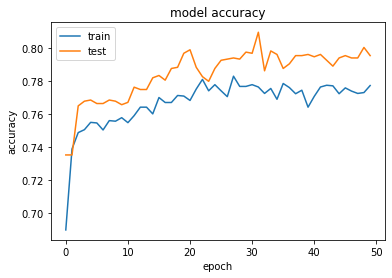

In [13]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

In [15]:
# The test accuracy of the neural network after 50 epochs is 78%.